<a href="https://colab.research.google.com/github/arthurvale/Perda-de-percurso-para-Redes-LoRaWAN-em-Ambientes-Compostos/blob/main/Treinamento_de_Modelos_Irlanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
!pip install folium

In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")


from geopy import distance

import numpy as np
import matplotlib.pyplot as plt


import folium

from datetime import datetime

import matplotlib.dates as mdates




In [ ]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Importação dos dados

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados - irlanda/Dados Irlanda Tratados.csv')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude_lora    528 non-null    float64
 1   longitude_lora   528 non-null    float64
 2   latitude_gtw     528 non-null    float64
 3   longitude_gtw    528 non-null    float64
 4   distancia_real   528 non-null    float64
 5   intervalo_tempo  528 non-null    object 
 6   horario_receb    528 non-null    object 
 7   rssi             528 non-null    float64
 8   snr              528 non-null    float64
dtypes: float64(7), object(2)
memory usage: 37.2+ KB


In [ ]:
dados['intervalo_tempo'] = pd.to_timedelta(dados['intervalo_tempo'])
dados['horario_receb'] = pd.to_datetime(dados['horario_receb']).dt.tz_localize(None)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   latitude_lora    528 non-null    float64        
 1   longitude_lora   528 non-null    float64        
 2   latitude_gtw     528 non-null    float64        
 3   longitude_gtw    528 non-null    float64        
 4   distancia_real   528 non-null    float64        
 5   intervalo_tempo  528 non-null    timedelta64[ns]
 6   horario_receb    528 non-null    datetime64[ns] 
 7   rssi             528 non-null    float64        
 8   snr              528 non-null    float64        
dtypes: datetime64[ns](1), float64(7), timedelta64[ns](1)
memory usage: 37.2 KB


# Pre Análise

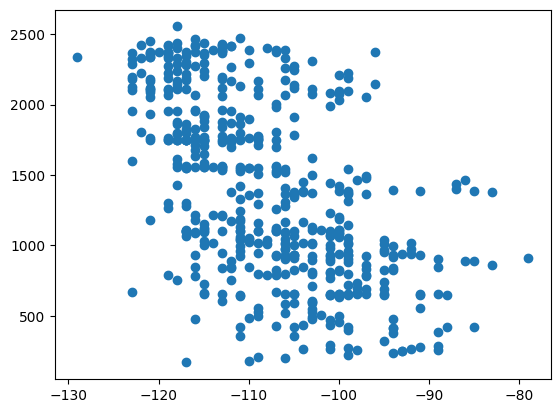

In [ ]:
plt.scatter(dados['rssi'], dados['distancia_real'])

In [ ]:
# Criar o mapa
latitude_central = round(dados['latitude_lora'].mean(), 6)
longitude_central = round(dados['longitude_lora'].mean(), 6)
mapa = folium.Map(location=[latitude_central, longitude_central])

# Definir os intervalos de tempo e as cores
intervalos_tempo = [
    ("08:18", "09:07", "blue"),
    ("09:07", "10:39", "green"),
    ("10:39", "12:02", "brown"),
    ("12:02", "12:43", "blue")
]

# DataFrame para armazenar os dados de cada intervalo de tempo
dados_intervalos = {}

for i, (inicio, fim, cor) in enumerate(intervalos_tempo, start=1):
    inicio_time = datetime.strptime(inicio, "%H:%M").time()
    fim_time = datetime.strptime(fim, "%H:%M").time()

    amostras_intervalo = dados[(dados['horario_receb'].dt.time >= inicio_time) &
                                            (dados['horario_receb'].dt.time < fim_time)]

    dados_intervalos[i] = amostras_intervalo

    for index, row in amostras_intervalo.iterrows():
        folium.CircleMarker(location=[row['latitude_lora'], row['longitude_lora']], color=cor).add_to(mapa)

folium.CircleMarker(location=[dados['latitude_gtw'][0], dados['longitude_gtw'][0]], color='red').add_to(mapa)

mapa


In [ ]:
colunas = ['rssi', 'distancia_real']

# ###
dados_1_modelo = pd.DataFrame(columns=colunas)
dados_1_modelo['rssi']=dados_intervalos[1]['rssi']
dados_1_modelo['distancia_real']=dados_intervalos[1]['distancia_real']
dados_1_modelo.sort_values(by='distancia_real', inplace=True)
dados_1_modelo.reset_index(drop=True, inplace=True)

dados_2_modelo = pd.DataFrame(columns=colunas)
dados_2_modelo['rssi']=dados_intervalos[2]['rssi']
dados_2_modelo['distancia_real']=dados_intervalos[2]['distancia_real']
dados_2_modelo.sort_values(by='distancia_real', inplace=True)
dados_2_modelo.reset_index(drop=True, inplace=True)

dados_3_modelo = pd.DataFrame(columns=colunas)
dados_3_modelo['rssi']=dados_intervalos[3]['rssi']
dados_3_modelo['distancia_real']=dados_intervalos[3]['distancia_real']
dados_3_modelo.sort_values(by='distancia_real', inplace=True)
dados_3_modelo.reset_index(drop=True, inplace=True)


dados_4_modelo = pd.DataFrame(columns=colunas)
dados_4_modelo['rssi']=dados_intervalos[4]['rssi']
dados_4_modelo['distancia_real']=dados_intervalos[4]['distancia_real']
dados_4_modelo.sort_values(by='distancia_real', inplace=True)
dados_4_modelo.reset_index(drop=True, inplace=True)

dados_suburban=pd.concat([dados_1_modelo, dados_4_modelo], axis=0)
dados_suburban.sort_values(by='distancia_real', inplace=True)
dados_suburban.reset_index(drop=True, inplace=True)


dados_central =  dados_2_modelo

dados_camp = dados_3_modelo

In [ ]:
dados_4_modelo

,rssi,distancia_real
0,-112.0,1735.404024
1,-115.0,1741.047094
2,-107.0,1747.168241
3,-113.0,1747.182541
4,-117.0,1749.923484
5,-117.0,1750.237968
6,-117.0,1750.256375
7,-121.0,1750.286645
8,-119.0,1750.329371
9,-116.0,1750.450415


In [ ]:
len(dados_4_modelo)

60

In [ ]:
print(len(dados_suburban))
print(len(dados_central))
print(len(dados_camp))

178
107
243


# Análises Por Setores:

Suburbana: dados_suburban

Centro urbano: dados_central

Parques, campos, rios: dados_camp


# Regiao Suburbana

In [ ]:
p_s=(dados_suburban['rssi']).values.astype(float)
d_s=np.log10(dados_suburban['distancia_real'].values.astype(float))

## Regressao Linear

In [ ]:
x_s_reg=d_s.reshape(-1, 1)
modelo = LinearRegression()
modelo.fit(x_s_reg, p_s)
p_s_reg = modelo.predict(x_s_reg)
rmse_s_reg=round(np.sqrt(np.mean((p_s - p_s_reg) ** 2)),3)



## Regressão Polinomial

In [ ]:
grau = 4
ajuste_LS = np.polyfit(d_s, p_s, grau)
p_s_pol = np.polyval(ajuste_LS, d_s)
rmse_s_pol=round(np.sqrt(np.mean((p_s - p_s_pol) ** 2)),3)


## 3GPP (Pl microcell: los x nlos)

In [ ]:
h_bs=67.00
h_ms=1.50
f_c=868.50
c=0

p_s_3_los= -35.4 +(26*np.log10(d_s)) + (20*np.log10(f_c))
p_s_recebida_los=20-p_s_3_los
rmse_s_los=round(np.sqrt(np.mean((p_s - p_s_recebida_los) ** 2)),3)

p_s_3_nl= -55.9 + (38*np.log10(d_s)) + (24.5 + (f_c/616.67))*np.log10(f_c)
p_s_recebida_nl=20 - p_s_3_nl
rmse_s_nl=round(np.sqrt(np.mean((p_s - p_s_recebida_nl) ** 2)),3)

if rmse_s_los > rmse_s_nl:
    rmse_s_3_basico = rmse_s_nl
    print(f'Para o modelo 3GPP, aplicado a zonas suburbanas (macrocell), NLos, o RMSE da potência recebida é: {rmse_s_3_basico}')
    print(f'Isso em comparação ao Path Loss, que obteve Rmse: {rmse_s_los}')
else:
    rmse_s_3_basico = rmse_s_los
    print(f'Para o modelo 3GPP, aplicado a zonas suburbanas(macrocell), Los, o RMSE da potência recebida é: {rmse_s_3_basico}')
    print(f'Isso em comparação ao NLos, que obteve Rmse: {rmse_s_nl}')


Para o modelo 3GPP, aplicado a zonas suburbanas (macrocell), NLos, o RMSE da potência recebida é: 89.419
Isso em comparação ao Path Loss, que obteve Rmse: 92.038


### Ajuste de offset - Path Loss

In [ ]:
print('O resultado acima indicou que Nlos é o mais adequado para esta situação, portanto o ajuste de offset será em cima desse.')

ajuste_3gpp= -89
p_receb_s_3_ajuste = ajuste_3gpp + p_s_recebida_nl
rmse_s_pot_receb_ajuste=round(np.sqrt(np.mean((p_s - p_receb_s_3_ajuste) ** 2)),3)
rmse_s_pot_receb_ajuste

O resultado acima indicou que Nlos é o mais adequado para esta situação, portanto o ajuste de offset será em cima desse.


8.555

## Okumura–Hata

In [ ]:
#altera
C= -2*((np.log(f_c/28))**2)-5.4
a=(1.1*np.log(f_c)-0.7)*h_ms - (1.56*np.log(f_c)-0.8)

#fixo
A=69.55+(26.16*np.log(f_c))-a-(13.82*np.log(h_bs))
B=44.9-(6.55*np.log(h_bs))

p_s_OH = A + C + (B*np.log(d_s/1000.00))
p_s_receb_OH=20-p_s_OH
rmse_s_oh=round(np.sqrt(np.mean((p_s - p_s_receb_OH) ** 2)),3)
print(rmse_s_oh)

ajuste_OH = -69
p_s_OH_ajuste= ajuste_OH + p_s_receb_OH
rmse_s_oh_ajuste=round(np.sqrt(np.mean((p_s - p_s_OH_ajuste) ** 2)),3)
print(rmse_s_oh_ajuste)

69.632
8.523


## ITU

In [ ]:
h=10
f_gz=f_c*1e-3
f=f_c* 1e6
c=3*1e8
d_bp=2*np.pi*h_bs*h_ms*f/c


df_sup_s = dados_suburban[dados_suburban['distancia_real'] > d_bp]
ddd=(df_sup_s['distancia_real'].values)
pl1_sup_s_itu=20*np.log10(40*np.pi*d_bp*f_gz/3) + \
              np.min((0.03*h**1.72,10))*np.log10(d_bp)- \
              np.min((0.044*h**1.72,14.77))+ \
              0.002 * np.log10(h)*d_bp
pl2_sup_s_itu=pl1_sup_s_itu + 40 * np.log10((ddd)/d_bp)
pl2_sup_s_itu_recebida= 20- pl2_sup_s_itu

df_sup_s=df_sup_s.assign(valores_modelos=(pl2_sup_s_itu_recebida))

df_inf_s = dados_suburban[dados_suburban['distancia_real'] <= d_bp]
dd=(df_inf_s['distancia_real'].values)
pl2_inf_s_itu=20*np.log10(40*np.pi*dd*f_gz/3) + \
              np.min((0.03*h**1.72,10))*np.log10(dd)-\
              np.min((0.044*h**1.72,14.77))+ \
              0.002 * np.log10(h)*dd
pl2_inf_s_itu_recebida= 20- pl2_inf_s_itu
df_inf_s=df_inf_s.assign(valores_modelos=pl2_inf_s_itu_recebida)

In [ ]:
df_s_itu = dados_suburban.copy()
df_s_itu['valores_modelos'] = np.nan
df_s_itu.loc[df_sup_s.index, 'valores_modelos'] = df_sup_s['valores_modelos']
df_s_itu.loc[df_inf_s.index, 'valores_modelos'] = df_inf_s['valores_modelos']

rmse_s_itu=round(np.sqrt(np.mean((p_s - df_s_itu['valores_modelos'].values) ** 2)),3)
print(rmse_s_itu)

ajuste_itu=-31
p_s_itu_ajust=(ajuste_itu+df_s_itu['valores_modelos'].values)
rmse_s_itu_ajuste=round(np.sqrt(np.mean((p_s - p_s_itu_ajust) ** 2)),3)
print(rmse_s_itu_ajuste)


31.742
7.198


## Resultados

-------------------------
REGIAO SUBURBANA:
-------------------------
Modelo: Regressão Linear. RMSE = 7.193.
Modelo: Interpolação Polinomial de grau 4. RMSE = 7.011.
Modelo: 3GPP. RMSE = 89.419. Ajuste de offset no valor: -88[dB], gera rmse = 8.555.
Modelo: Okumura–Hata. RMSE = 69.632. Ajuste de offset no valor: -12[dB], gera rmse = 8.523.
Modelo: ITU Advanced. RMSE = 31.742. Ajuste de offset no valor: -32[dB], gera rmse = 7.198.


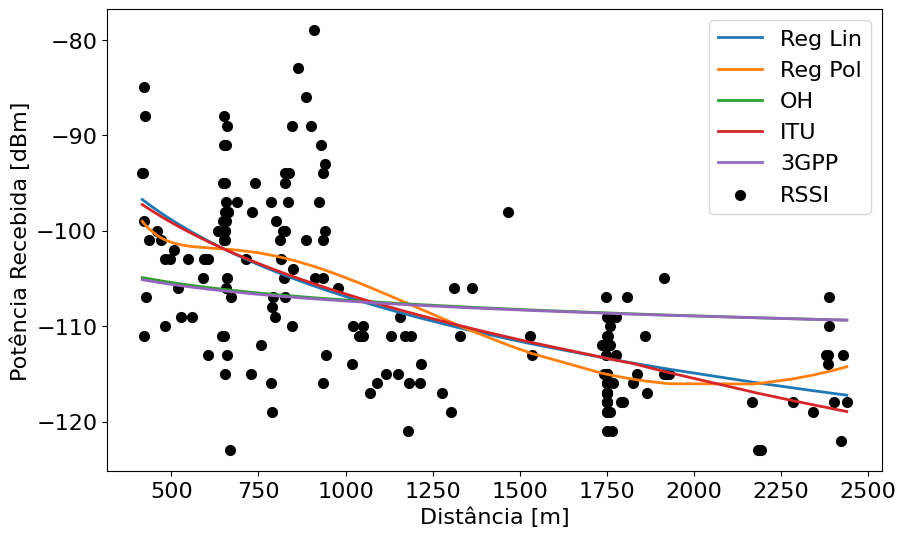

In [ ]:
print('-----'*5)
print('REGIAO SUBURBANA:')
print('-----'*5)
print(f'Modelo: Regressão Linear. RMSE = {rmse_s_reg}.')
print(f'Modelo: Interpolação Polinomial de grau 4. RMSE = {rmse_s_pol}.')
print(f'Modelo: 3GPP. RMSE = {rmse_s_3_basico}. Ajuste de offset no valor: {ajuste_3gpp}[dB], gera rmse = {rmse_s_pot_receb_ajuste}.')
print(f'Modelo: Okumura–Hata. RMSE = {rmse_s_oh}. Ajuste de offset no valor: {ajuste_OH}[dB], gera rmse = {rmse_s_oh_ajuste}.')
print(f'Modelo: ITU Advanced. RMSE = {rmse_s_itu}. Ajuste de offset no valor: {ajuste_itu}[dB], gera rmse = {rmse_s_itu_ajuste}.')

plt.figure(figsize=(10, 6))

plt.plot(dados_suburban['distancia_real'],(p_s_reg) , label='Reg Lin',linewidth=2)
plt.plot(dados_suburban['distancia_real'],(p_s_pol) , label='Reg Pol',linewidth=2)
plt.plot(dados_suburban['distancia_real'],(p_s_OH_ajuste) , label='OH',linewidth=2)
plt.plot(dados_suburban['distancia_real'],(p_s_itu_ajust) , label='ITU',linewidth=2)
plt.plot(dados_suburban['distancia_real'],(p_receb_s_3_ajuste) , label='3GPP',linewidth=2)

plt.scatter(dados_suburban['distancia_real'], (p_s), c = 'black', label='RSSI',linewidth=2)

plt.legend(fontsize=16)
plt.xlabel('Distância [m]', fontsize=16)
plt.ylabel('Potência Recebida [dBm]', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# Região central

In [ ]:
p_c=(dados_central['rssi']).values.astype(float)
d_c=np.log10(dados_central['distancia_real'].values.astype(float))

## Regressao Linear

In [ ]:
x_c_reg=d_c.reshape(-1, 1)
modelo = LinearRegression()
modelo.fit(x_c_reg, p_c)
p_c_reg = modelo.predict(x_c_reg)
rmse_c_reg=round(np.sqrt(np.mean((p_c - p_c_reg) ** 2)),3)

## Regressão Polinomial

In [ ]:
grau = 4
ajuste_LS = np.polyfit(d_c, p_c, grau)
p_c_pol = np.polyval(ajuste_LS, d_c)
rmse_c_pol=round(np.sqrt(np.mean((p_c - p_c_pol) ** 2)),3)

## 3GPP (pl macrocell)

In [ ]:
h_bs=67.00
h_ms=1.50
f_c=868.50
c=3 #urban macro

p_c_3_pl= ((44.9 - (6.55 * np.log10(h_bs))) * (np.log10(d_c/1000.00))) + 45.5 + (35.46 - (1.1*h_ms)*np.log10(f_c)) - (13.82*np.log10(h_ms)) + (0.7*h_ms) + c
p_c_recebida_pl=20-p_c_3_pl
rmse_c_pl=round(np.sqrt(np.mean((p_c - p_c_recebida_pl) ** 2)),3)
rmse_c_3_basico = rmse_c_pl
print(f'Para o modelo 3GPP, aplicado a zonas centrais(macrocell), o Path Loss apresenta  RMSE= {rmse_c_3_basico}')


Para o modelo 3GPP, aplicado a zonas centrais(macrocell), o Path Loss apresenta  RMSE= 137.582


### Ajuste de offset - Path Loss

In [ ]:
ajuste_3gpp= -137
p_c_3_pl_ajuste = ajuste_3gpp + p_c_recebida_pl
rmse_c_pl_ajuste=round(np.sqrt(np.mean((p_c - p_c_3_pl_ajuste) ** 2)),3)
rmse_c_pl_ajuste

7.209

## Okumura–Hata

In [ ]:
#altera
C= 0
a=(1.1*np.log(f_c)-0.7)*h_ms - (1.56*np.log(f_c)-0.8)

#fixo
A=69.55+(26.16*np.log(f_c))-a-(13.82*np.log(h_bs))
B=44.9-(6.55*np.log(h_bs))

p_c_OH = A + C + (B*np.log(d_c/1000.00))
p_c_receb_OH= 20 -p_c_OH

rmse_c_oh=round(np.sqrt(np.mean((p_c - p_c_receb_OH) ** 2)),3)
print(rmse_c_oh)

ajuste_OH = -44
p_c_OH_ajuste= ajuste_OH + p_c_receb_OH
rmse_c_oh_ajuste=round(np.sqrt(np.mean((p_c - p_c_OH_ajuste) ** 2)),3)
print(rmse_c_oh_ajuste)

45.014
7.206


## ITU

In [ ]:
h=10
f_gz=f_c*1e-3
f=f_c* 1e6
c=3*1e8
d_bp=4*(h_bs-1)*(h_ms-1)*f/c


df_sup_c = dados_central[dados_central['distancia_real'] > d_bp]
ddd=(df_sup_c['distancia_real'].values)
pl1_sup_c_itu= (22 * np.log10(ddd)) + 28 + (20 * np.log10(f_gz))
pl1_sup_c_itu_recebida= 20- pl1_sup_c_itu
df_sup_c=df_sup_c.assign(valores_modelos=(pl1_sup_c_itu_recebida))

df_inf_c = dados_central[dados_central['distancia_real'] <= d_bp]
dd=(df_inf_c['distancia_real'].values)
pl2_inf_c_itu=40 * np.log10(dd) +\
              7.8 - 18 * np.log10(h_bs-1) -\
              18 * np.log10(h_ms-1) + 2 * np.log10(f_gz)
pl2_inf_c_itu_recebida= 20- pl2_inf_c_itu
df_inf_c=df_inf_c.assign(valores_modelos=pl2_inf_c_itu_recebida)
print(df_inf_c)

Empty DataFrame
Columns: [rssi, distancia_real, valores_modelos]
Index: []


In [ ]:
# df_inf_c vazio quer dizer que todos os D desta amostragem sao maiores que o d_bp calculado

rmse_c_itu=round(np.sqrt(np.mean((p_c - df_sup_c['valores_modelos'].values) ** 2)),3)
print(rmse_c_itu)
ajuste_itu=-33
p_c_itu_ajust=(ajuste_itu+df_sup_c['valores_modelos'].values)
rmse_c_itu_ajuste=round(np.sqrt(np.mean((p_c - p_c_itu_ajust) ** 2)),3)
print(rmse_c_itu_ajuste)

34.104
7.164


## Resultados

-------------------------
REGIAO CENTRAL:
-------------------------
Modelo: Regressão Linear. RMSE = 7.155.
Modelo: Interpolação Polinomial de grau 4. RMSE = 6.998.
Modelo: 3GPP. RMSE = 137.582. Ajuste de offset no valor: -88[dB], gera rmse = 7.209.
Modelo: Okumura–Hata. RMSE = 45.014. Ajuste de offset no valor: -12[dB], gera rmse = 7.206.
Modelo: ITU Advanced. RMSE = 34.104. Ajuste de offset no valor: -32[dB], gera rmse = 7.164.


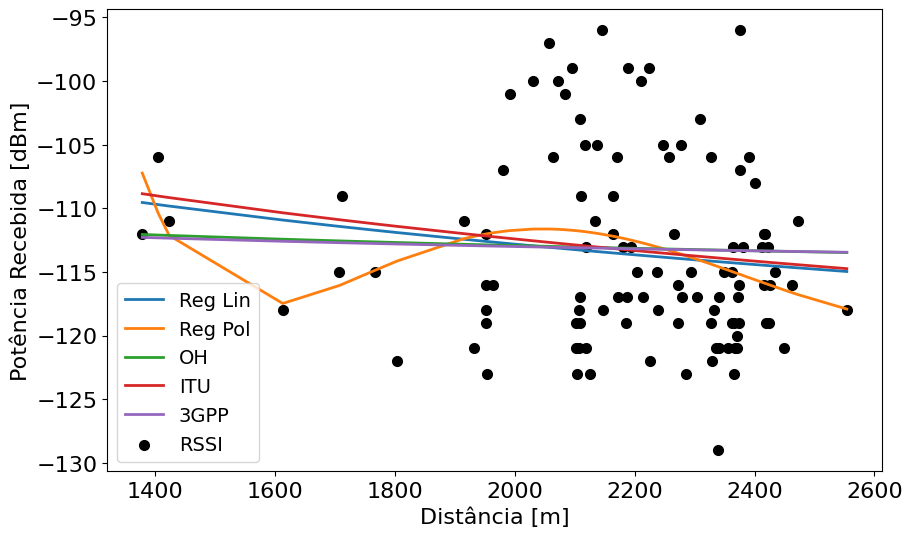

In [ ]:
print('-----'*5)
print('REGIAO CENTRAL:')
print('-----'*5)
print(f'Modelo: Regressão Linear. RMSE = {rmse_c_reg}.')
print(f'Modelo: Interpolação Polinomial de grau 4. RMSE = {rmse_c_pol}.')
print(f'Modelo: 3GPP. RMSE = {rmse_c_3_basico}. Ajuste de offset no valor: {ajuste_3gpp}[dB], gera rmse = {rmse_c_pl_ajuste}.')
print(f'Modelo: Okumura–Hata. RMSE = {rmse_c_oh}. Ajuste de offset no valor: {ajuste_OH}[dB], gera rmse = {rmse_c_oh_ajuste}.')
print(f'Modelo: ITU Advanced. RMSE = {rmse_c_itu}. Ajuste de offset no valor: {ajuste_itu}[dB], gera rmse = {rmse_c_itu_ajuste}.')

plt.figure(figsize=(10, 6))

plt.plot(dados_central['distancia_real'],(p_c_reg) , label='Reg Lin',linewidth=2)
plt.plot(dados_central['distancia_real'],(p_c_pol) , label='Reg Pol',linewidth=2)
plt.plot(dados_central['distancia_real'],(p_c_OH_ajuste) , label='OH',linewidth=2)
plt.plot(dados_central['distancia_real'],(p_c_itu_ajust) , label='ITU',linewidth=2)
plt.plot(dados_central['distancia_real'],(p_c_3_pl_ajuste), label='3GPP',linewidth=2)

plt.scatter(dados_central['distancia_real'], (p_c), c='black', label='RSSI',linewidth=2)

plt.legend(fontsize=14)
plt.xlabel('Distância [m]',fontsize=16)
plt.ylabel('Potência Recebida [dBm]',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


# Região Rural

In [ ]:
p_camp=(dados_camp['rssi']).values.astype(float)
d_camp=np.log10(dados_camp['distancia_real'].values.astype(float))

## Regressão Linear

In [ ]:
x_camp_reg=d_camp.reshape(-1, 1)
modelo = LinearRegression()
modelo.fit(x_camp_reg, p_camp)
p_camp_reg = modelo.predict(x_camp_reg)
rmse_camp_reg=round(np.sqrt(np.mean((p_camp - p_camp_reg) ** 2)),3)

## Regressão Polinomial

In [ ]:
grau = 4
ajuste_LS = np.polyfit(d_camp, p_camp, grau)
p_camp_pol = np.polyval(ajuste_LS, d_camp)
rmse_camp_pol=round(np.sqrt(np.mean((p_camp - p_camp_pol) ** 2)),3)

## 3GPP (Pl microcell: los x nlos)


In [ ]:
h_bs=67.00
h_ms=1.50
f_c=868.50

p_camp_3_los= -35.4 +(26*np.log10(d_camp)) + (20*np.log10(f_c))
p_camp_recebida_los=20-p_camp_3_los
rmse_camp_los=round(np.sqrt(np.mean((p_camp - p_camp_recebida_los) ** 2)),3)

p_camp_3_nl= -55.9 + (38*np.log10(d_camp)) + (24.5 + (f_c/616.67))*np.log10(f_c)
p_camp_recebida_nl=20 - p_camp_3_nl
rmse_camp_nl=round(np.sqrt(np.mean((p_camp - p_camp_recebida_nl) ** 2)),3)

if rmse_camp_los > rmse_camp_nl:
    rmse_camp_3_basico = rmse_camp_nl
    print(f'Para o modelo 3GPP, aplicado a áreas verdes (macrocell), NLos, o RMSE da potência recebida é: {rmse_camp_3_basico}')
    print(f'Isso em comparação ao Path Loss, que obteve Rmse: {rmse_camp_los}')
else:
    rmse_camp_3_basico = rmse_camp_los
    print(f'Para o modelo 3GPP, aplicado a áreas verdes(macrocell), Los, o RMSE da potência recebida é: {rmse_camp_3_basico}')
    print(f'Isso em comparação ao NLos, que obteve Rmse: {rmse_camp_nl}')


Para o modelo 3GPP, aplicado a áreas verdes (macrocell), NLos, o RMSE da potência recebida é: 87.903
Isso em comparação ao Path Loss, que obteve Rmse: 90.506


### Ajuste  de offset - Potencia recebida

In [ ]:
print('O resultado acima indicou que Nlos é o mais adequado para esta situação, portanto o ajuste de offset será em cima desse.')

ajuste_3gpp= -88
p_receb_camp_3_ajuste = ajuste_3gpp + p_camp_recebida_nl
rmse_camp_3_ajuste=round(np.sqrt(np.mean((p_camp - p_receb_camp_3_ajuste) ** 2)),3)
rmse_camp_3_ajuste

O resultado acima indicou que Nlos é o mais adequado para esta situação, portanto o ajuste de offset será em cima desse.


7.919

## Okumura–Hata

In [ ]:
#altera
C= -4.78*((np.log(f_c/28))**2)-40.98+ (18.33 * np.log(f_c))
a=(1.1*np.log(f_c)-0.7)*h_ms - (1.56*np.log(f_c)-0.8)

#fixo
A=69.55+(26.16*np.log(f_c))-a-(13.82*np.log(h_bs))
B=44.9-(6.55*np.log(h_bs))

p_camp_OH = A + C + (B*np.log(d_camp/1000.00))
p_camp_receb_OH= 20 -p_camp_OH

rmse_camp_oh=round(np.sqrt(np.mean((p_camp - p_camp_receb_OH) ** 2)),3)
print(rmse_camp_oh)

ajuste_OH = -12
p_camp_OH_ajuste= ajuste_OH + p_camp_receb_OH
rmse_camp_oh_ajuste=round(np.sqrt(np.mean((p_camp - p_camp_OH_ajuste) ** 2)),3)
print(rmse_camp_oh_ajuste)


14.351
7.89


In [ ]:
print(f_c*1e-3)
print(f_c* 1e6)

0.8685
868500000.0


## ITU

In [ ]:
h=5
f_gz=f_c*1e-3
c=3*1e8
d_bp=2*np.pi*h_bs*h_ms*f/c


df_sup_camp = dados_camp[dados_camp['distancia_real'] > d_bp]

pl1_sup_camp_itu=20*np.log10(40*np.pi*d_bp*f_gz/3) + \
              np.min((0.03*h**1.72,10))*np.log10(d_bp)- \
              np.min((0.044*h**1.72,14.77))+ \
              0.002 * np.log10(h)*d_bp
ddd=(df_sup_camp['distancia_real'].values)
pl2_sup_camp_itu=pl1_sup_camp_itu + 40 * np.log10((ddd)/d_bp)
pl1_sup_camp_itu_recebida= 20- pl2_sup_camp_itu
df_sup_camp=df_sup_camp.assign(valores_modelos=(pl1_sup_camp_itu_recebida))

df_inf_camp = dados_camp[dados_camp['distancia_real'] <= d_bp]
dd=(df_inf_camp['distancia_real'].values)
pl2_inf_camp_itu=20*np.log10(40*np.pi*dd*f_gz/3) + \
              np.min((0.03*h**1.72,10))*np.log10(dd)-\
              np.min((0.044*h**1.72,14.77))+ \
              0.002 * np.log10(h)*dd
pl2_inf_camp_itu_recebida= 20- pl2_inf_camp_itu
df_inf_camp=df_inf_camp.assign(valores_modelos=pl2_inf_camp_itu_recebida)

In [ ]:
df_CAMP_itu = dados_camp.copy()
df_CAMP_itu['valores_modelos'] = np.nan
df_CAMP_itu.loc[df_sup_camp.index, 'valores_modelos'] = df_sup_camp['valores_modelos']
df_CAMP_itu.loc[df_inf_camp.index, 'valores_modelos'] = df_inf_camp['valores_modelos']

rmse_camp_itu=round(np.sqrt(np.mean((p_camp - df_CAMP_itu['valores_modelos'].values) ** 2)),3)
print(rmse_camp_itu)

ajuste_itu=-32
p_camp_itu_ajust=(ajuste_itu+df_CAMP_itu['valores_modelos'].values)
rmse_camp_itu_ajuste=round(np.sqrt(np.mean((p_camp - p_camp_itu_ajust) ** 2)),3)
print(rmse_camp_itu_ajuste)

32.892
7.883


## Resultados

-------------------------
ÁREAS VERDES:
-------------------------
Modelo: Regressão Linear. RMSE = 7.646.
Modelo: Interpolação Polinomial de grau 4. RMSE = 7.176.
Modelo: 3GPP. RMSE = 87.903. Ajuste de offset no valor: -88[dB], gera rmse = 7.919.
Modelo: Okumura–Hata. RMSE = 14.351. Ajuste de offset no valor: -12[dB], gera rmse = 7.89.
Modelo: ITU Advanced. RMSE = 32.892. Ajuste de offset no valor: -32[dB], gera rmse = 7.883.


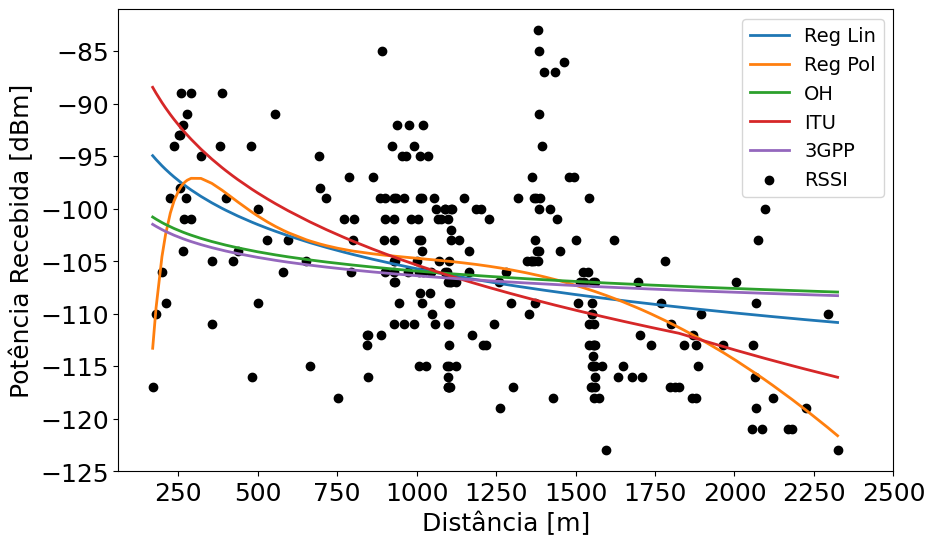

In [ ]:
print('-----'*5)
print('ÁREAS VERDES:')
print('-----'*5)
print(f'Modelo: Regressão Linear. RMSE = {rmse_camp_reg}.')
print(f'Modelo: Interpolação Polinomial de grau 4. RMSE = {rmse_camp_pol}.')
print(f'Modelo: 3GPP. RMSE = {rmse_camp_3_basico}. Ajuste de offset no valor: {ajuste_3gpp}[dB], gera rmse = {rmse_camp_3_ajuste}.')
print(f'Modelo: Okumura–Hata. RMSE = {rmse_camp_oh}. Ajuste de offset no valor: {ajuste_OH}[dB], gera rmse = {rmse_camp_oh_ajuste}.')
print(f'Modelo: ITU Advanced. RMSE = {rmse_camp_itu}. Ajuste de offset no valor: {ajuste_itu}[dB], gera rmse = {rmse_camp_itu_ajuste}.')

plt.figure(figsize=(10, 6))

plt.plot(dados_camp['distancia_real'],(p_camp_reg) , label='Reg Lin',linewidth=2)
plt.plot(dados_camp['distancia_real'],(p_camp_pol) , label='Reg Pol',linewidth=2)
plt.plot(dados_camp['distancia_real'],(p_camp_OH_ajuste) , label='OH',linewidth=2)
plt.plot(dados_camp['distancia_real'],(p_camp_itu_ajust) , label='ITU',linewidth=2)
plt.plot(dados_camp['distancia_real'],(p_receb_camp_3_ajuste), label='3GPP',linewidth=2)


plt.scatter(dados_camp['distancia_real'], (p_camp), c='black', label='RSSI')

plt.legend(fontsize=14)
plt.xlabel('Distância [m]',fontsize=18)
plt.ylabel('Potência Recebida [dBm]',fontsize=18)
plt.xticks(range(250, 2501, 250), fontsize=18)
plt.yticks(fontsize=18)
plt.show()